In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
cleaned_df = pd.read_csv('Data/Cleaned_Modifications.tsv', sep = '\t')
cleaned_df = cleaned_df[cleaned_df['Observed Modifications'].notna()]

In [3]:
delta_mass = []
mass_name = []
for modification in cleaned_df['Observed Modifications']:
    mods = re.split(',', modification)
    for mod in mods:
        pattern = pattern = r'\(\-?\d+\.\d+\)'
        mod_label = re.sub(pattern, '',  mod)
        mass_shift = re.search(pattern, mod)
        if not mass_shift:
            print(mod)
            continue
        mass_shift = mass_shift[0]
        mass_shift = mass_shift.replace('(', '')
        mass_shift = mass_shift.replace(')', '')
        mass_shift = float(mass_shift)
        delta_mass.append(mass_shift)
        mass_name.append(mod_label)
observed_modification_df = pd.DataFrame({'Delta Mass': delta_mass, 'Observed Modification': mass_name})


In [8]:
list(pd.unique(observed_modification_df['Observed Modification']))

['Xlink:EGS[115]',
 ' Methyl',
 'Arg',
 'Ammonium',
 '  Methyl:2H(3)',
 ' Carboxy',
 ' Carbamyl',
 'Cation:Fe[III]',
 ' Oxidation',
 'Lys',
 'Ammonia-loss',
 ' Propyl',
 '  Trimethyl',
 ' Quinone',
 ' Propionamide',
 ' Hydroxymethyl',
 '  methylol',
 ' ISD_z+2_ion',
 'Methyl:2H(3)',
 'Delta:H(4)C(2)O(-1)S(1)',
 'Hep',
 'Acetyl:13C(2)',
 '  Ethanolyl',
 ' Delta:H(4)C(2)',
 '  Dimethyl',
 '  Ethyl',
 'AzidoF',
 'ICPL:13C(6)2H(4)',
 'Dioxidation',
 'ISD_z+2_ion',
 'Cation:Mg[II]',
 '  Cation:Na',
 '  glyoxalAGE',
 ' Carbamidomethyl',
 '  Gly',
 'Cation:Fe[II]',
 'Label:13C(2)15N(2)',
 '  Label:13C(3)15N(1)',
 '  Label:18O(2)',
 'Dehydrated',
 'Ub-Br2',
 ' Methyl+Deamidated',
 'Cation:Ca[II]',
 'Dipyrrolylmethanemethyl',
 '  Delta:H(4)C(2)O(-1)S(1)',
 'Fluoro',
 ' Delta:H(2)C(2)',
 'Menadione-HQ',
 'Xlink:DSS[259]',
 '  HNE',
 'Delta:H(6)C(3)O(1)',
 'Oxidation',
 'Cation:Na',
 '  TMAB',
 'N-dimethylphosphate',
 'Acetylhypusine',
 ' Xlink:EGS[115]',
 'Methyl:2H(3)13C(1)',
 'Dethiomethyl',
 

In [4]:
interesting_masses = [-128.094963, -17.026549, 14.015650, 43.005814, 128.094963, 486.251206, 156.101111, 259.141973, -58.005479, 298.193280, 428.191582]

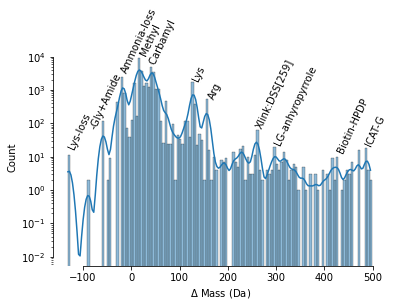

In [5]:
sns.histplot(observed_modification_df, x = 'Delta Mass', kde = True, log_scale = (False, True), binwidth = 5)
sns.despine(trim = True)
plt.xlabel(r'$\Delta$' + ' Mass (Da)')
plt.xlim = (0, 10^6)
for mass in interesting_masses:
    x = mass - 5
    y = sum(observed_modification_df['Delta Mass'] == mass)
    z = list(observed_modification_df[observed_modification_df['Delta Mass'] == mass]['Observed Modification'])[0]
    rotation = 65
    if z == ' Methyl':
        y += 5050
        x += 5
    elif z == 'Ammonia-loss':
        y += 1000
        x -= 1
    elif z == ' Carbamyl':
        y += 500
        x -= 5
    elif  z == 'Lys':
        y += 500
    elif z == 'Arg':
        y += 100
        x += 5
    elif z == ' Gly-loss+Amide':
        z = '-Gly+Amide'
        x -= 25
        y -= 50
    elif z == 'Biotin-HPDP':
        y += 5
    else:
        y += 10
    plt.text(x = x, y = y, s = z, color = 'black', rotation = rotation)
plt.savefig('Figures/Figure 2) Histogram of PTM Masses.png', bbox_inches = 'tight')
plt.show()